There are two gravitational bodies of mass $m_1$ and $m_2$ a distance $s$ apart. Their orbits are exactly circular, so they rotate around their common center of mass at a fixed rate $\omega$ with fixed radii $r_1$ and $r_2$.

$$
s = r_1 + r_2
$$

Let's imagine a reference frame rotating at rate $\omega$ in the plane of the bodies' orbit, with origin located at the center of mass of the two bodies, so that the two bodies are stationary in this frame. The positions of the bodies are:

$$
\mathbf r_1 = -r_1 \hat x
\quad\quad
\mathbf r_2 = r_2 \hat x
$$

In order for the center of mass to be at the origin:

$$
\frac{1}{m_1 + m_1} (m_1 \mathbf r_1 + m_2 \mathbf r_2) = 0
\rightarrow\quad
-m_1 r_1 + m_2 r_2 = 0
$$

Now we can find both $r_1$ and $r_2$ in terms of $s$ by substituting $r_2=s - r_1$ and $r_1 = s - r_2$.

$$
-m_1 r_1 + m_2 (s - r_1)
= -(m_1 + m_2) r_1 + m_2 s
= 0
$$

$$
\rightarrow\quad
r_1 = \frac{m_2}{m_1 + m_2} s
$$

$$
-m_1 (s - r_2) + m_2 r_2
= (m_1 + m_2) r_2 - m_1 s
= 0
$$

$$
\rightarrow\quad
r_2 = \frac{m_1}{m_1 + m_2} s
$$

Each body feels a gravitational force toward the other.

$$
\mathbf F_{g1}
= \frac{G m_1 m_2}{s^2} \hat x
\quad\quad
\mathbf F_{g2}
= -\frac{G m_1 m_2}{s^2} \hat x
$$

Also there is a fictitious centrifugal force pushing the bodies away from the origin, due to the rotation of the coordinate system.

$$
\mathbf F_{c1} = -\omega^2 m_1 r_1 \hat x
\quad\quad
\mathbf F_{c2} = \omega^2 m_2 r_2 \hat x
$$

The gravitational and centrifugal force on each body needs to cancel out.

$$
\mathbf F_{g1} = \mathbf F_{c1}
\quad\rightarrow\quad
\frac{G m_1 m_2}{s^2}
= \omega^2 m_1 r_1
= \omega^2 \frac{ m_1 m_2}{m_1 + m_2} s
$$

$$
\quad\rightarrow\quad
\omega = \sqrt{\frac{G (m_1 + m_2)}{s^3}}
$$

To check that that is correct, let's plug in the masses and distance for the earth and sun. Of course the earth's orbit around the sun is not exactly circular, but if we plug in the average distance, we should get an orbit period of roughly 1 year.

In [1]:
m_earth = 5.972e24  # kg
m_sun = 1.989e30    # kg
G = 6.6743e-11      # m^3 kg^-1 s^-2
s = 1.50e11         # m

omega = (G * (m_earth + m_sun) / s**3)**(0.5)
period_seconds = 2 * 3.14159 / omega
period_days = period_seconds / (60 * 60 * 24)
print(f'orbit period: {period_days:.2f} days')

orbit period: 366.68 days


Ok now imagine there is a satellite of mass $m$ somewhere in the orbital plane of the two bodies, so its position in the rotating frame is:

$$
\mathbf r = x \hat x + y \hat y
$$

There is a centrifugal force on the satellite due to the rotating frame.

$$
\mathbf F_c
= \omega^2 m \mathbf r
= \frac{G (m_1 + m_2)}{s^3} m \mathbf r
$$

And the gravitational bodies also pull on the satellite:

$$
\mathbf F_g
= -G m m_1\frac{\mathbf r - \mathbf r_1}{|\mathbf r - \mathbf r_1|^3}
  - G m m_2\frac{\mathbf r - \mathbf r_2}{|\mathbf r - \mathbf r_2|^3}
$$

So the net gravitational-centrifugal field acting on the satellite is then:

$$
\mathbf E
= \frac{1}{m}(\mathbf F_c + \mathbf F_g)
= G \frac{m_1 + m_2}{s^3} \mathbf r
-G m_1 \frac{\mathbf r - \mathbf r_1}{|\mathbf r - \mathbf r_1|^3}
-G m_2 \frac{\mathbf r - \mathbf r_2}{|\mathbf r - \mathbf r_2|^3}
$$

Keep in mind that this formula is only valid for a satellite that is stationary in the rotating frame. If it were moving, then there would be an additional force acting on it, the Coriolis force, which depends on the velocity of the satellite.

I want to find the values of $\mathbf r$ where $E = 0$. In order to do that, I'm going to need to split $\mathbf E$ into its components.

$$
\mathbf E = E_x \hat x + E_y \hat y
$$

$$
\mathbf r - \mathbf r_1
= (x \hat x + y \hat y) - (-r_1 \hat x)
= (x + r_1) \hat x + y \hat y
$$

$$
|\mathbf r - \mathbf r_1|
= \sqrt{(x + r_1)^2 + y^2}
$$

$$
\mathbf r - \mathbf r_2
= (x \hat x + y \hat y) - (r_2 \hat x)
= (x - r_2) \hat x + y \hat y
$$

$$
|\mathbf r - \mathbf r_2|
= \sqrt{(x - r_2)^2 + y^2}
$$

$$
E_x =
G \frac{m_1 + m_2}{s^3}  x
- G m_1 \frac{x + r_1}{\Bigl((x + r_1)^2 + y^2\Bigr)^{3/2}}
- G m_2 \frac{x - r_2}{\Bigl((x - r_2)^2 + y^2\Bigr)^{3/2}}
$$

$$
E_y =
G \frac{m_1 + m_2}{s^3}  y
- G m_1 \frac{y}{\Bigl((x + r_1)^2 + y^2\Bigr)^{3/2}}
- G m_2 \frac{y}{\Bigl((x - r_2)^2 + y^2\Bigr)^{3/2}}
$$

One thing I can do right now is to generate a plot of $E$ with numerically computed values.

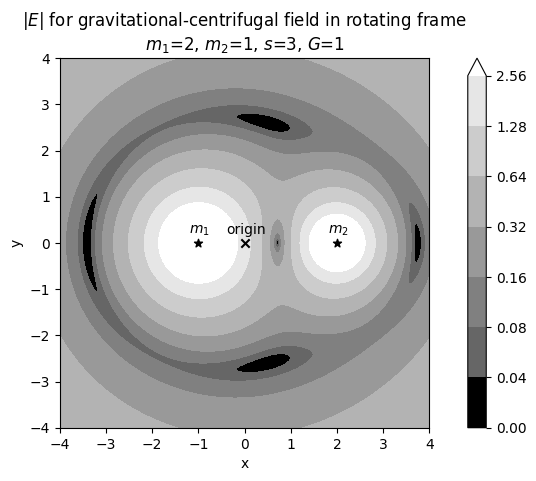

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
G = 1
m1 = 2
m2 = 1
s = 3

# Find positions of bodies and rotational velocity
r1 = s * m2 / (m1 + m2)
r2 = s * m1 / (m1 + m2)

# Calculate |E| for a range of positions
x_vals = np.linspace(-4, 4, 500)
y_vals = np.linspace(-4, 4, 500)
x, y = np.meshgrid(x_vals, y_vals)
denom1 = ((x + r1)**2 + y**2)**(3/2)
denom2 = ((x - r2)**2 + y**2)**(3/2)
omega2 = G * (m1 + m2) / s**3
E_x = (
    omega2 * x
    - G * m1 * (x + r1) / denom1
    - G * m2 * (x - r2) / denom2
)
E_y = (
    omega2 * y
    - G * m1 * y / denom1
    - G * m2 * y / denom2
)
E = (E_x**2 + E_y**2)**0.5

# Create plot
cs = plt.contourf(
    x, y, E,
    levels=[0] + [0.04 * (2**n) for n in range(7)],
    colors=['0.0', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'],
    extend='max',
)
plt.colorbar(cs)
plt.scatter([-r1, r2], [0, 0], marker='*', color='0.0')
plt.scatter(0, 0, marker='x', color='0.0')
ax = plt.gca()
ax.annotate('$m_1$', (-r1-0.2, 0.2))
ax.annotate('$m_2$', (r2-0.2, 0.2))
ax.annotate('origin', (0-0.4, 0.2))
plt.axis('square')
plt.ylabel('y')
plt.xlabel('x')
plt.title((
    '$|E|$ for gravitational-centrifugal field in rotating frame\n'
    f'$m_1$={m1}, $m_2$={m2}, $s$={3}, $G$={1}'
))
plt.show()

We can see in the above plot that there are five little spots where $E < 0.04$. Presumably, there's one point in each of those five spots where $E=0$ exactly. My task is to find them algebraically.

$$
E_y =
G \frac{m_1 + m_2}{s^3}  y
- G m_1 \frac{y}{\Bigl((x + r_1)^2 + y^2\Bigr)^{3/2}}
- G m_2 \frac{y}{\Bigl((x - r_2)^2 + y^2\Bigr)^{3/2}}
= 0
$$

It's clear that one class of solutions has $y = 0$, so let's find the values for $x$ that satisfy $E_x = 0$ when $y=0$.

$$
E_{x(y=0)}
= G \frac{m_1 + m_2}{s^3} x
- G m_1 \frac{x + r_1}{\Bigl((x + r_1)^2\Bigr)^{3/2}}
- G m_2 \frac{x - r_2}{\Bigl((x - r_2)^2\Bigr)^{3/2}}
$$

$$
= G \frac{m_1 + m_2}{s^3} x
- G m_1 \frac{x}{|x|} \frac{1}{(x + r_1)^{2}}
- G m_2 \frac{x}{|x|} \frac{1}{(x - r_2)^{2}}
= 0
$$

$$
\rightarrow\quad
(m_1 + m_2) |x|
- m_1 s^3 \frac{1}{(x + r_1)^{2}}
- m_2 s^3 \frac{1}{(x - r_2)^{2}}
= 0
$$

This is a complicated 5th degree polynomial, also called a quintic. Quintics are not always solvable in closed form. I tried a few times to find a solution to this one, but could not.

Many people have tackled this, and I've seen claims online that these coplanar (meaning $y = 0$) Lagrange points do not have a closed form solution.

[The Lagrange Points, by Neil J. Cornish](https://map.gsfc.nasa.gov/ContentMedia/lagrange.pdf) says:

> We are unable to find closed-form solutions ... for general values of $a$, so instead we seek approximate solutions valid in the limit $ a \ll 1$.

In their case, $a = m_2 / (m_1 + m_2)$, so in other words, they are approximating that $m_1 \gg m_2$.

But I'm having trouble finding a definitive proof that the coplanar points have no closed form solution. If no one has written it, then there is a chance that a close form solution actually does exist.